In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import galpy as gal
import astropy.coordinates as coord
from astropy import units as u
from astropy import io
from galpy import potential
from scipy import constants
from galpy import orbit
import mplcyberpunk

In [2]:
plt.style.use(["cyberpunk"])
plt.rcParams['figure.figsize'] = 10.0,8.0
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   :18}
plt.rc("font",**font)
plt.rcParams.update({"grid.alpha":0.2})

In [3]:
ro,vo= 8.25, 220.

In [15]:
pdisco = potential.MiyamotoNagaiPotential(amp=(6e10)*u.solMass,
                                                  a=3*u.kpc,b=0.28*u.kpc,ro=ro,vo=vo)
pbulbo = potential.PlummerPotential(amp=(1e10)*u.solMass,b=750*u.pc,ro=ro,vo=vo)
phalo = potential.HernquistPotential(amp=(1e12)*u.solMass,a=25*u.kpc,ro=ro,vo=vo)
pbar = potential.SoftenedNeedleBarPotential(amp=1e10*u.Msun,a=3.5*u.kpc,c=1.*u.kpc,
                                          omegab=1.85,ro=ro,vo=vo)
pt = pdisco + pbulbo + phalo + pbar

In [16]:

diskp= potential.MiyamotoNagaiPotential(amp=6.*10.**10.*u.Msun,a=3.*u.kpc,b=0.28*u.kpc,ro=ro,vo=vo)
halop= potential.NFWPotential(a=2.,normalize=0.35,ro=ro,vo=vo)
#sbp= potential.SoftenedNeedleBarPotential(amp=10.**10.*u.Msun,a=3.5*u.kpc,c=1.*u.kpc,
#                                          omegab=1.85,ro=ro,vo=vo)
npot= potential.PlummerPotential(amp=2.*10.**10*u.Msun,b=750.*u.pc,ro=ro,vo=vo)
pot= [diskp,halop,npot]


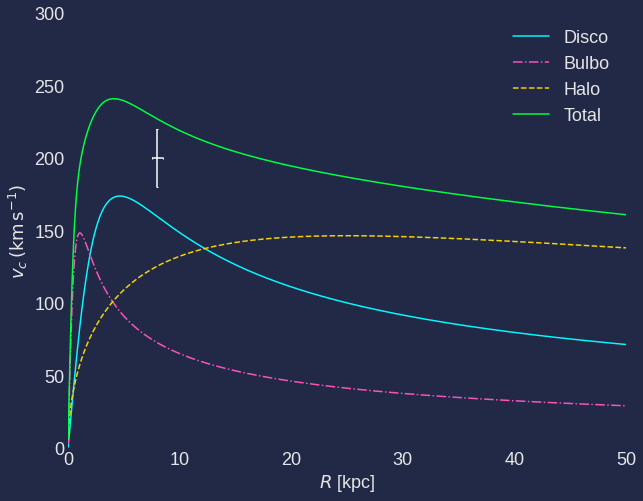

In [17]:
pdisco.plotRotcurve(Rrange=[0.01,50],overplot=True,label="Disco")

pbulbo.plotRotcurve(Rrange=[0.01,50],overplot=True,label="Bulbo",ls="-.")
phalo.plotRotcurve(Rrange=[0.01,50],overplot=True,label="Halo",ls="--")
#pbar.plotRotcurve(Rrange=[0.01,50],overplot=True,label="Barra",phi=0*u.deg,ls=":")
potential.plotRotcurve(pt,Rrange=[0.01,50],phi=90.*u.deg,overplot=True,label="Total")
#mplcyberpunk.make_lines_glow()
#potential.plotRotcurve(potential.MWPotential2014,use_physical=True,
#                       ro=ro,vo=vo,overplot=True)
#potential.plotRotcurve(pot,use_physical=True,phi=90.*u.deg,overplot=True,color="red")
plt.errorbar(8,200,yerr=20,xerr=0.5,color="white",capsize=1)

plt.grid(False)
plt.legend()
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel(r'$v_c\,(\mathrm{km\,s}^{-1})$')
plt.xlabel("$R$ [kpc]")
#mplcyberpunk.add_glow_effects(gradient_fill=False)
plt.show()

In [18]:
potential.vcirc(pt,R=8*u.kpc,phi=90*u.deg)

227.2081376686284

In [8]:
giants = pd.DataFrame(pd.read_csv("giants.csv"))
giants["par/error"] = giants["parallax"]/giants["parallax_error"]

giants = giants.loc[giants["par/error"] >= 5]

In [9]:
giants["distance"] = 1/(giants["parallax"]) #kpc

In [10]:
pos = coord.SkyCoord(ra=giants["ra"][:]*u.degree,dec=giants["dec"][:]*u.degree,
                     distance=giants["distance"]*u.kpc,pm_ra_cosdec = giants["pmra"][:]*u.mas/u.yr,
                     pm_dec = giants["pmdec"][:]*u.mas/u.yr,
                     radial_velocity=giants["dr2_radial_velocity"][:]*u.km/u.s,
                     frame="icrs")

In [29]:
transformada = pos.transform_to(coord.Galactocentric(galcen_distance=8.25*u.kpc))

In [34]:
apjsdfla = transformada.representation_type="cylindrical"

In [30]:
gc_frame= coord.Galactocentric()
cg= transformada.transform_to(gc_frame)
cg.representation= 'cylindrical'

In [14]:
R = giants["R_Rzphi"]*u.kpc
vR= giants["vR_Rzphi"]*u.km/u.s
vT = giants["vT_Rzphi"]*u.km/u.s
vz = giants["vz_Rzphi"]*u.km/u.s
z = giants["z_Rzphi"]*u.kpc
phi = giants["phi_Rzphi"]*u.deg

In [15]:
lista = np.array([R,vR,vT,z,vz,phi])

In [51]:
lista.transpose()

array([[ 8.00808379e+00, -2.67384923e+02,  9.11773237e+01,
        -2.26566757e+00,  4.70473373e+00, -3.19501370e-01],
       [ 7.99998570e+00, -4.07358730e+01,  1.69211994e+02,
        -1.16387279e+00, -7.03999717e+01, -1.63791844e-01],
       [ 7.99756129e+00, -1.77417535e+02,  6.95774542e+01,
        -1.16588057e+00, -7.37737728e+01, -1.64326273e-01],
       ...,
       [ 7.91928357e+00, -6.31901698e+01,  2.12249191e+02,
         9.40988239e-02,  1.33289895e+01, -2.29150738e-02],
       [ 6.17321522e+00, -4.82540778e+01,  1.55403599e+02,
         5.29794604e-01, -3.96804833e+01, -2.18176991e-01],
       [ 7.06256235e+00,  8.15807293e+01,  2.10368168e+02,
         2.98164590e-01,  1.44429733e+01, -1.03023852e-01]])

In [52]:
orbita = orbit.Orbit(transformada)

In [53]:
lz = orbita.Lz()

In [54]:
giants["lz"] = lz

In [55]:
giants["L_Z"]

0          730.155648
1         1353.693529
2          556.449955
3          627.286282
4         1667.437362
             ...     
183632    1826.934658
183633    1724.344680
183634    1680.861531
183635     959.339861
183636    1485.738301
Name: L_Z, Length: 178974, dtype: float64

In [56]:
giants["lz"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4         1658.460383
             ...     
183632    1853.893457
183633            NaN
183634            NaN
183635     885.249003
183636    1442.389999
Name: lz, Length: 178974, dtype: float64

In [49]:
orbita.E(pot=pt)

AssertionError: Physical conversion for the Orbit object is not consistent with that of the Potential given to it